# **Imports & Setup**

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler,RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
)
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor


from src.utils.viz import plot_distribution,plot_all_distributions






import warnings
warnings.filterwarnings('ignore')


# **Data Loading & Inspection**

In [185]:
df_v0 = pd.read_csv("data/dataset.csv")
columns_to_drop = ['Unnamed: 0', 'track_id']
df_v0 = df_v0.drop(columns=columns_to_drop, axis=1)



>**Warning:** The `track_id` column should not be used for modeling since it's a unique identifier.


In [186]:
df_v0

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [187]:
df_v0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

> 💡 **Note:** Only **3 columns** — `artists`, `album_name`, and `track_name` — contain **a single null value** each.  
> Since these likely correspond to the **same row** (representing one incomplete track entry), it is **safe to drop that row** entirely to maintain dataset integrity.


In [188]:
df_v0 = df_v0.dropna()

In [189]:
df_v0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

In [190]:
df_v0.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


> 🔍**Insights:** 
> 1. Most tracks have low-to-moderate popularity - right-skewed distribution (**log-transform**)

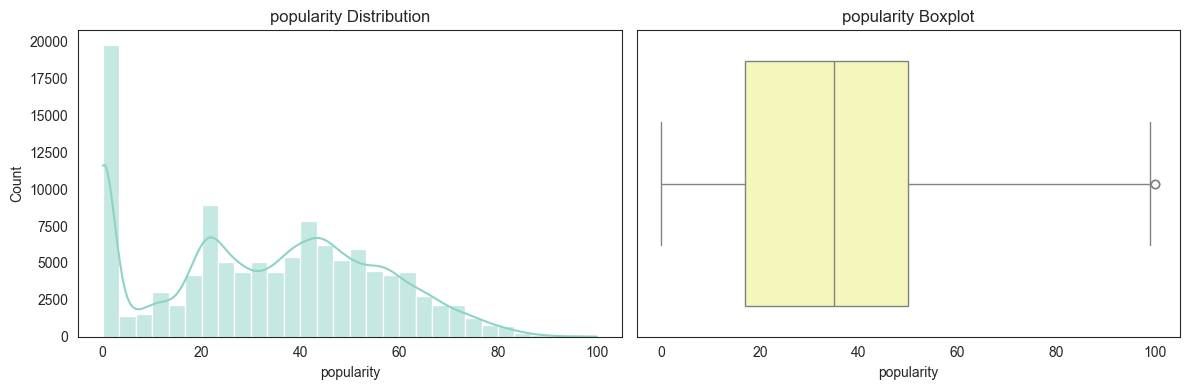

In [191]:
plot_distribution(df_v0, column='popularity', bins=30, kde=True, hist_color='C0', box_color='C1', figsize=(12, 4))


> 2. duration_ms in milisecond - Most songs are within the 2–5 min range (**Remove extreme outliers (very short/long tracks)**)

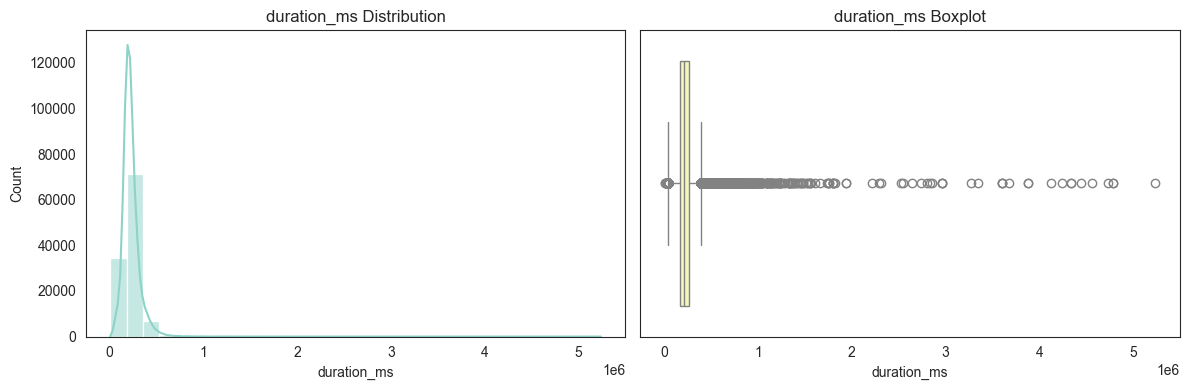

In [192]:
plot_distribution(df_v0, column='duration_ms' )


> 3. danceability its okey (**normalize and scale only**)


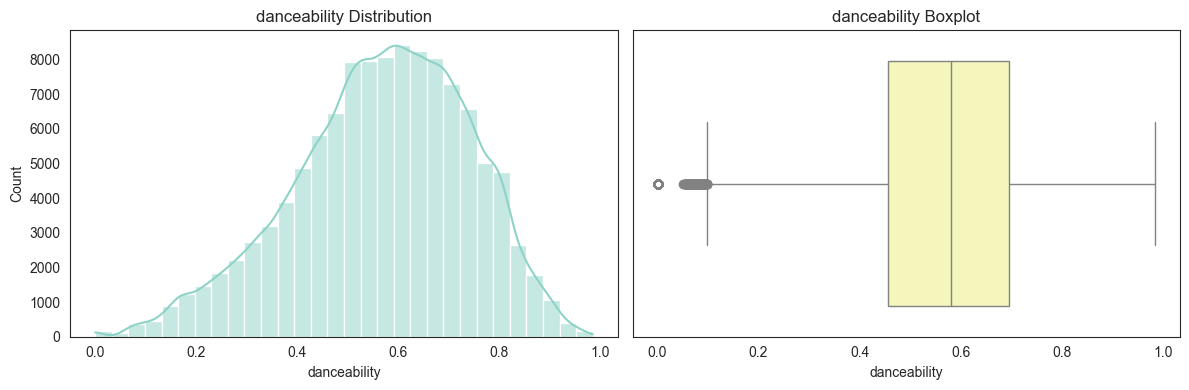

In [193]:
plot_distribution(df_v0, column='danceability' )


> 4. energy Skewed toward higher energy tracks.

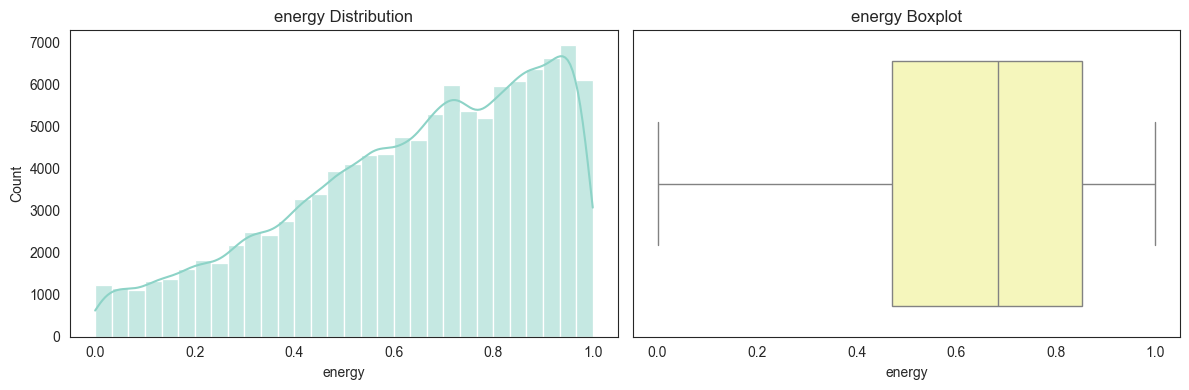

In [194]:
plot_distribution(df_v0, column='energy' )


> 5. i think `key` column is not important and also it should be categorical not numerical .

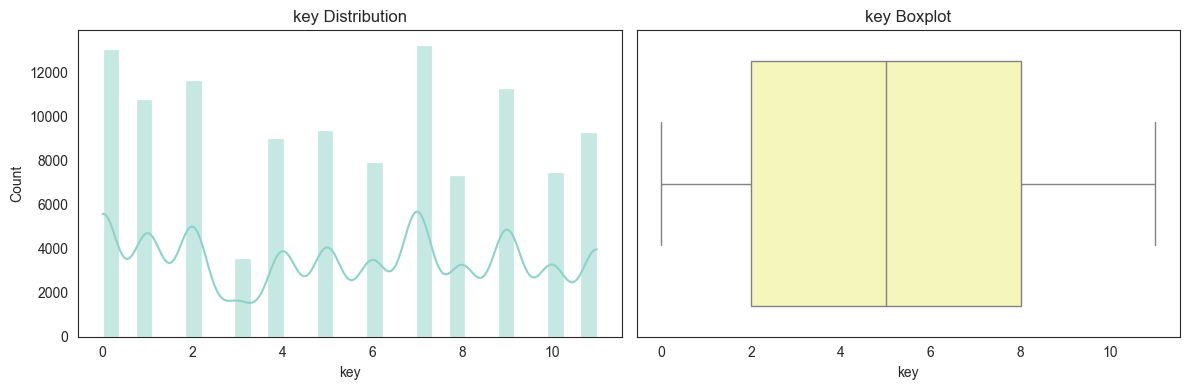

In [195]:
plot_distribution(df_v0, column='key' )


> 6. loudness accually i cant determine any insight but we will see and its left skewed (i saw it after i visualized🤣)

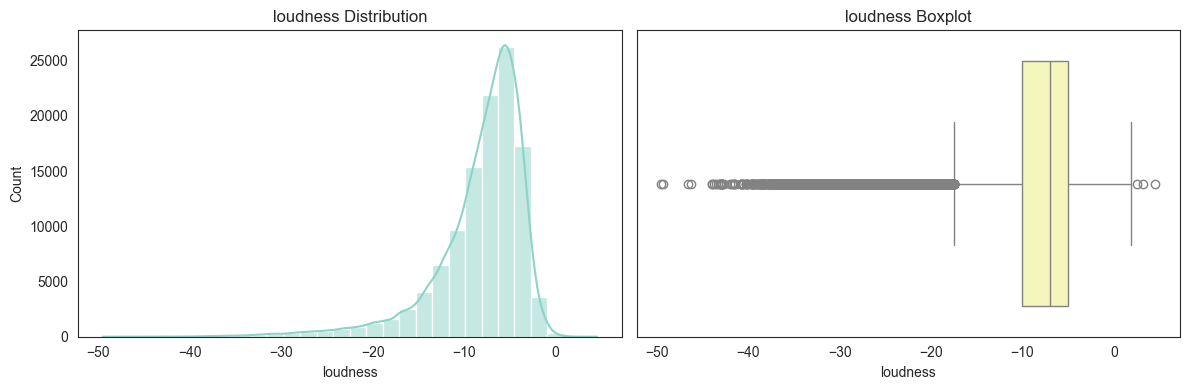

In [196]:
plot_distribution(df_v0, column='loudness' )

> 7. its only 0 and 1 values mostly 1(major)

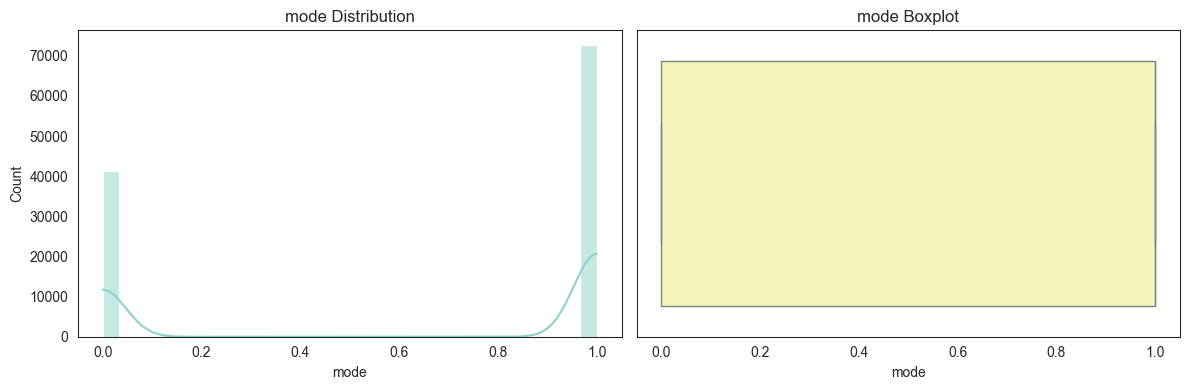

In [197]:
plot_distribution(df_v0, column='mode' )


> 8. speechiness Mostly low . Skewed distribution (log-transform) or leave depend we will see later

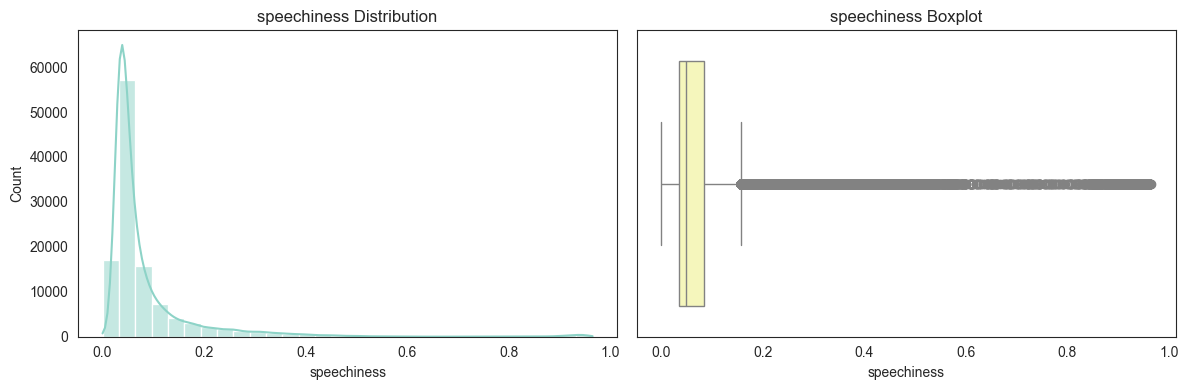

In [198]:
plot_distribution(df_v0, column='speechiness' )


> 9. Could indicate genre type ( Confidence that a track is acoustic (0.0–1.0)) i just ask chatgpt what is it 

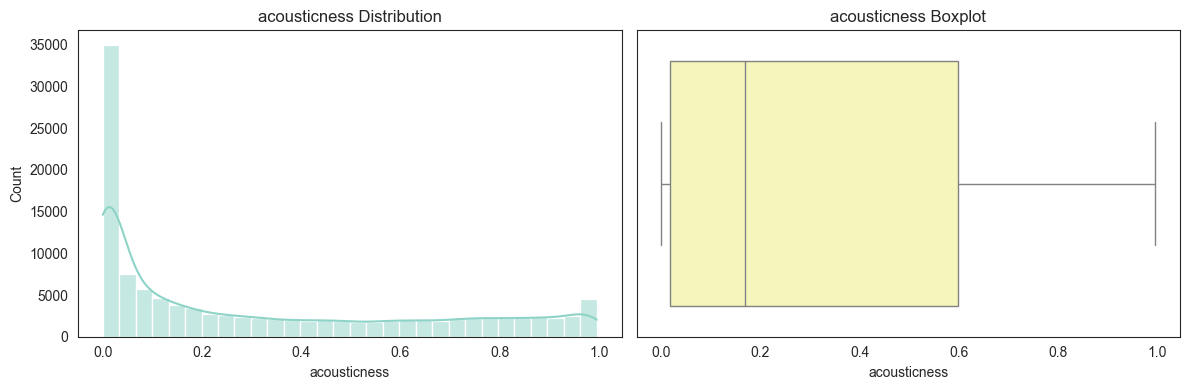

In [199]:
plot_distribution(df_v0, column='acousticness' )


> 10. instrumentalness Mostly zero i dont know if i have to concider it 0 for no instrumental and 1 for instrumental like divide it into two caegories

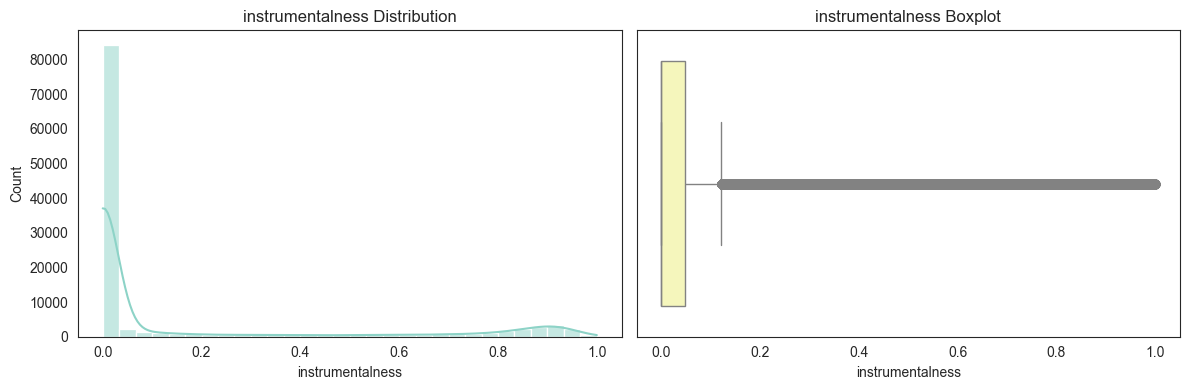

In [200]:
plot_distribution(df_v0, column='instrumentalness' )

> 11. liveness Median 0.132, max 1 . Mostly low values.  Probability that the track was performed live (0.0–1.0). 

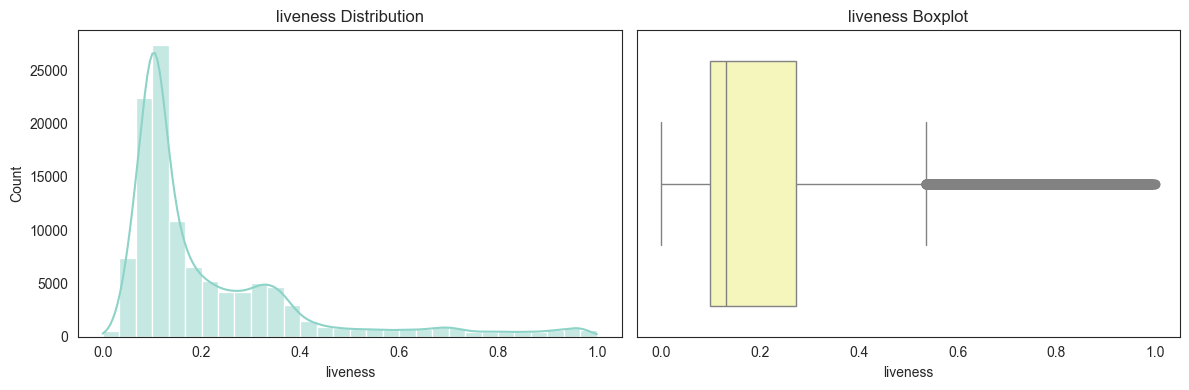

In [201]:
plot_distribution(df_v0, column='liveness' )

> 12. valence Mean ~0.47. Neutral distribution (Positiveness of the musical mood (0.0–1.0))

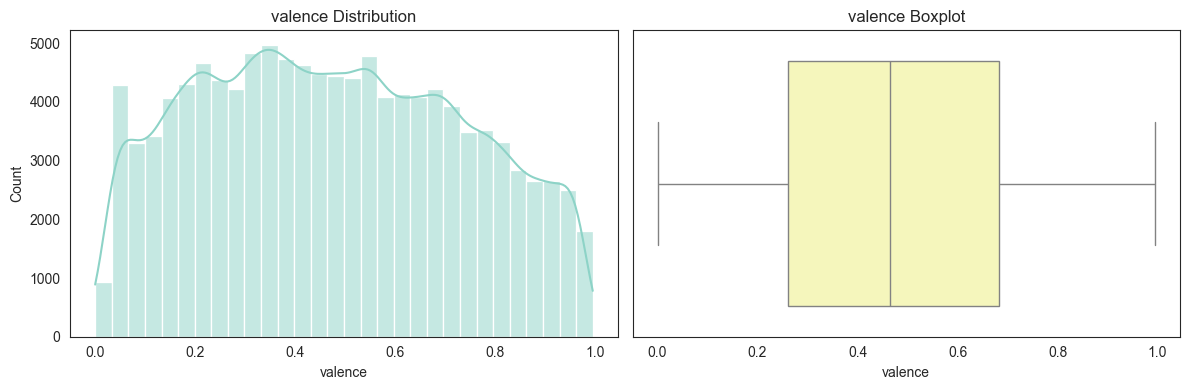

In [202]:
plot_distribution(df_v0, column='valence' )

> 13. tempo i Mean ~120 BPM. Normal distribution (The overall estimated tempo of a track in beats per minute (BPM))


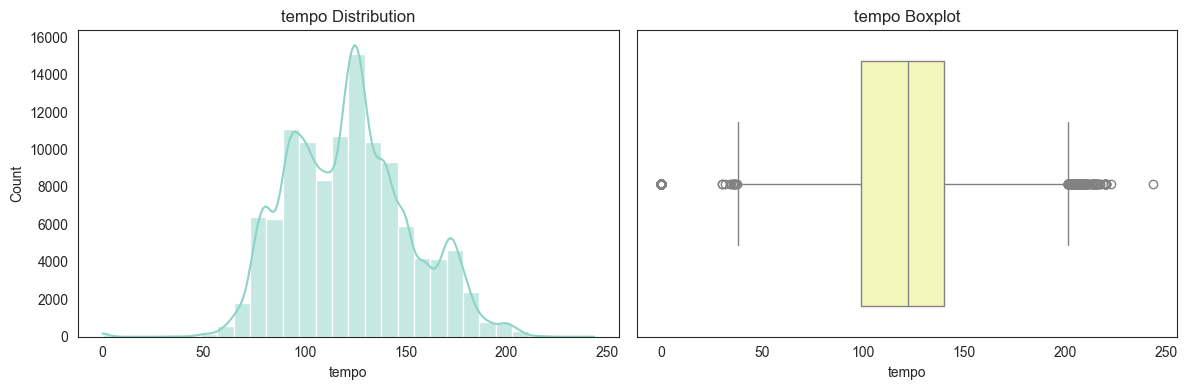

In [203]:
plot_distribution(df_v0, column='tempo' )

> 14. time_signature Mostly 4/4(Beats per bar (time signature).  --- IGNORE ---


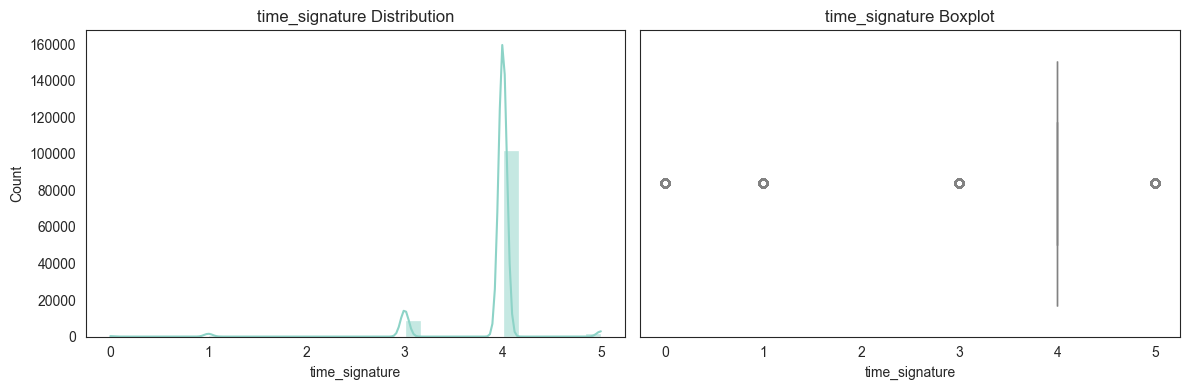

In [204]:
plot_distribution(df_v0, column='time_signature' )

##### > **Probably need to remove outliers after train-test split… remind me, Shady 🤣**


In [205]:
df_v0.describe(include='O')

,artists,album_name,track_name,track_genre
count,113999,113999,113999,113999
unique,31437,46589,73608,114
top,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,279,195,151,1000


## > **Lets see the mess in categorical data**


In [206]:
categorical_cols = df_v0.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['artists', 'album_name', 'track_name', 'track_genre']


In [207]:
df_v0["artists"].value_counts().reset_index()

,artists,count
0,The Beatles,279
1,George Jones,271
2,Stevie Wonder,236
3,Linkin Park,224
4,Ella Fitzgerald,222
...,...,...
31432,Hillsong Worship;TAYA;David Ware,1
31433,for KING & COUNTRY;Andy Mineo,1
31434,Bethel Music;Francesca Battistelli,1
31435,Descansa,1


In [208]:
df_v0["artists"].value_counts().reset_index()["artists"].tolist()

['The Beatles',
 'George Jones',
 'Stevie Wonder',
 'Linkin Park',
 'Ella Fitzgerald',
 'Prateek Kuhad',
 'Feid',
 'Chuck Berry',
 'Håkan Hellström',
 'OneRepublic',
 'The Beach Boys',
 'my little airport',
 'Elvis Presley',
 'Charlie Brown Jr.',
 'Red Hot Chili Peppers',
 'Bryan Adams',
 'Scooter',
 'Daddy Yankee',
 'Arctic Monkeys',
 'BTS',
 'Norah Jones',
 'The Prophet',
 'Hank Williams',
 'Glee Cast',
 'Don Omar',
 'Vybz Kartel',
 'Los Prisioneros',
 'CoComelon',
 'Anupam Roy',
 'Seiko Matsuda',
 'Burna Boy',
 'Weezer',
 'Dean Martin',
 'Rob Zombie',
 'Germaine Franco',
 'Marilyn Manson',
 'Hank Williams;Drifting Cowboys',
 'J Balvin',
 'Eikichi Yazawa',
 'Nat King Cole',
 'Eason Chan',
 'Almafuerte',
 'Maneva',
 'Lamb of God',
 'Little Symphony',
 'Yiruma',
 'Jay Chou',
 'Rammstein',
 'Carlos Gardel',
 "Dan Gibson's Solitudes",
 'Napalm Death',
 'Sujatha',
 'Pink Floyd',
 'Nogizaka46',
 'BOØWY',
 'Wisin & Yandel',
 'Sarah, the Illstrumentalist',
 'Oleg Pogudin',
 'Nirvana',
 'Shir

## **clean `artists` column**

In [209]:
df_v0['artists'] = df_v0['artists'].str.lower().str.strip()


df_v0['num_artists'] = df_v0['artists'].str.count(';') + 1
df_v0['primary_artist'] = df_v0['artists'].str.split(';').str[0].str.strip()


In [210]:
df_v0.head(20)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,num_artists,primary_artist
0,gen hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1,gen hoshino
1,ben woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1,ben woodward
2,ingrid michaelson;zayn,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2,ingrid michaelson
3,kina grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1,kina grannis
4,chord overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1,chord overstreet
5,tyrone wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,...,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,1,tyrone wells
6,a great big world;christina aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,...,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,2,a great big world
7,jason mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,...,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,1,jason mraz
8,jason mraz;colbie caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,...,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,2,jason mraz
9,ross copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,...,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,1,ross copperman


In [211]:
df_v1 = df_v0.copy()
df_v1['individual_artist'] = df_v1['artists'].str.split(';')
df_v1 = df_v1.explode('individual_artist')
df_v1['individual_artist'] = df_v1['individual_artist'].str.strip()


In [212]:
df_v1

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,num_artists,primary_artist,individual_artist
0,gen hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1,gen hoshino,gen hoshino
1,ben woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1,ben woodward,ben woodward
2,ingrid michaelson;zayn,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2,ingrid michaelson,ingrid michaelson
2,ingrid michaelson;zayn,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2,ingrid michaelson,zayn
3,kina grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1,kina grannis,kina grannis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,rainy lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,...,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,1,rainy lullaby,rainy lullaby
113996,rainy lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,...,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,1,rainy lullaby,rainy lullaby
113997,cesária evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,...,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,1,cesária evora,cesária evora
113998,michael w. smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,...,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,1,michael w. smith,michael w. smith


In [213]:
df_v1.describe(include='O')

,artists,album_name,track_name,track_genre,primary_artist,individual_artist
count,158292,158292,158292,158292,158292,158292
unique,31428,46589,73608,114,17639,29811
top,the beatles,Classical Christmas,Run Rudolph Run,classical,wolfgang amadeus mozart,j balvin
freq,279,310,151,2483,1006,510


## **clean `album_name` column**

In [214]:
df_v1["album_name"].value_counts().reset_index()

,album_name,count
0,Classical Christmas,310
1,Feliz Cumpleaños con Perreo,306
2,Hans Zimmer: Epic Scores,278
3,Weihnachten Klassik 2022,275
4,Homecoming Latin Party,247
...,...,...
46584,The Best of Type O Negative,1
46585,Praise Before My Breakthrough,1
46586,Psalms,1
46587,Detalles,1


In [215]:
df_v1["album_name"].value_counts().reset_index()["album_name"].tolist()

['Classical Christmas',
 'Feliz Cumpleaños con Perreo',
 'Hans Zimmer: Epic Scores',
 'Weihnachten Klassik 2022',
 'Homecoming Latin Party',
 'Mozart - All Day Classics',
 'Fiesta portatil',
 'Mozart: A Night of Classics',
 'Halloween con perreito',
 'Alternative Christmas 2022',
 'Classical Christmas 2022',
 'Frescura y Perreo',
 'EDM Gaming Music Autumn/Winter 2022',
 'Esto me suena a Farra',
 'Mozart - A Classical Dawn',
 'Queda poco para la PAES 2.0',
 'Arbeitsmusik Herbst/Winter 2022/2023',
 'Halloween 2022 Perreo Vol. 4',
 'Mozart - Inspiring Classics',
 'Perreo Tenebroso Vol. 2',
 'Klassische Weihnachtsmusik',
 'Night Drive Autumn/Winter 2022/23',
 'Reggeaton Imperdible',
 'Perreo en Halloween',
 'El perreo es el futuro',
 'Perreo Tenebroso Vol. 1',
 'Fiesta Reggaeton 2010s',
 "pov: it's 2021",
 'Reggaeton Mix Perreito',
 'Perreo Tenebroso Vol. 3',
 'Classical Running',
 'Clásicos de ahora: Perreo',
 'Bájale como 7500',
 'Perreo Tenebroso Vol. 4',
 'Electro sounds',
 'Última Mis

In [216]:
df_v1['album_name'] = df_v1['album_name'].str.strip().str.lower()

## sorry i use ai  here🥱🥱

In [217]:
def clean_album_name(album):
    """Remove common suffixes and metadata from album names"""
    import re
    if pd.isna(album):
        return album

    # Remove content in parentheses (Live, Remastered, etc.)
    album = re.sub(r'\s*\([^)]*(?:Live|Ao Vivo|En Vivo|En Directo)[^)]*\)', '', album, flags=re.IGNORECASE)
    album = re.sub(r'\s*\([^)]*(?:Remastered|Remaster)[^)]*\)', '', album, flags=re.IGNORECASE)
    album = re.sub(r'\s*\([^)]*(?:Deluxe|Special|Extended|Expanded|Platinum|Limited)\s*Edition[^)]*\)', '', album, flags=re.IGNORECASE)
    album = re.sub(r'\s*\([^)]*(?:Original|Motion Picture|Soundtrack)[^)]*\)', '', album, flags=re.IGNORECASE)
    album = re.sub(r'\s*\([^)]*(?:Broadway|Cast Recording)[^)]*\)', '', album, flags=re.IGNORECASE)

    # Remove year indicators (but be careful not to remove meaningful numbers)
    album = re.sub(r'\s*(?:Autumn|Winter|Spring|Summer|Fall)[/\s]*(?:20\d{2})', '', album, flags=re.IGNORECASE)
    album = re.sub(r'\s*(?:20\d{2})[/\s]*(?:Autumn|Winter|Spring|Summer|Fall)', '', album, flags=re.IGNORECASE)
    album = re.sub(r'\s*20\d{2}/(?:20)?\d{2,4}', '', album)  # "2022/2023"

    # Remove volume/part indicators (optional - depends on your needs)
    album = re.sub(r',?\s*(?:Vol\.?|Volume|Part|Pt\.?)\s*\d+', '', album, flags=re.IGNORECASE)

    # Clean up multiple spaces and trim
    album = re.sub(r'\s+', ' ', album).strip()

    # Remove trailing punctuation
    album = re.sub(r'[\s\-,;:]+$', '', album)

    return album

In [218]:
df_v1['album_name'] = df_v1['album_name'].apply(clean_album_name)


## **clean `track_name` column**

In [219]:
df_v1["track_name"].value_counts().reset_index()

,track_name,count
0,Run Rudolph Run,151
1,Pantysito,132
2,CÓMO SE SIENTE - Remix,128
3,La Llevo Al Cielo,120
4,Crazy What Love Can Do,117
...,...,...
73603,Suspiro,1
73604,"Ambient Attention, Pt. 14",1
73605,Paz Mental,1
73606,Alive In You,1


In [220]:
df_v1["track_name"].value_counts().reset_index()["track_name"].tolist()

['Run Rudolph Run',
 'Pantysito',
 'CÓMO SE SIENTE - Remix',
 'La Llevo Al Cielo',
 'Crazy What Love Can Do',
 'X ÚLTIMA VEZ',
 'Ley Seca',
 'On Repeat',
 'Qué Más Pues?',
 'Y, ¿Si Fuera Ella? - + Es +',
 'Hot in It',
 'UN PESO',
 'Happier',
 'Secreto',
 'PORFA - Remix',
 'Halloween',
 'Algo Me Gusta De Ti',
 'The Middle',
 'Frosty The Snowman',
 'LA CANCIÓN',
 'Hasta Abajo',
 'Little Saint Nick - 1991 Remix',
 'Last Last',
 'AEIOU',
 'Christmas Time',
 'For My Hand',
 'Winter Wonderland',
 'The Motto',
 'Ferrari',
 'The Christmas Song (Chestnuts Roasting On An Open Fire)',
 'Déjate Querer',
 'No Me Conoce - Remix',
 'Suite No. 3 in D Major, BWV 1068: II. Air',
 'Stay',
 'Sleigh Ride',
 'Everything but You',
 'RUMBATÓN',
 'Skate',
 'Sound the Alarm',
 'Vuelve',
 'If You Really Love Me (How Will I Know)',
 'GATÚBELA',
 'HISTORY',
 'Feliz Cumpleaños Ferxxo',
 'Rudolph The Red-Nosed Reindeer',
 "Don't You Worry Child - Radio Edit",
 'In Your Arms (For An Angel)',
 'Christmas All Over Agai

## Oops, AI magic strikes again 😴

In [221]:
def clean_track_name(track):
    """Remove metadata suffixes and annotations from track names"""
    import re
    if pd.isna(track):
        return track

    original = track

    # Remove featured artists (save the core track name)
    track = re.sub(r'\s*[\(\[]?\s*(?:feat\.|featuring|feat|ft\.|ft|with|con)\s+[^)\]]+[\)\]]?', '', track, flags=re.IGNORECASE)

    # Remove remix/edit indicators with remixer name
    track = re.sub(r'\s*-\s*(?:.*?)(?:Remix|Rework|Re-?mix|Edit|Mix)', '', track, flags=re.IGNORECASE)
    track = re.sub(r'\s*\([^)]*(?:Remix|Rework|Re-?mix|Edit|Mix)[^)]*\)', '', track, flags=re.IGNORECASE)

    # Remove version indicators
    track = re.sub(r'\s*-\s*(?:Radio|Album|Single|Extended|Deluxe|VIP|Original)\s+(?:Edit|Version|Mix)', '', track, flags=re.IGNORECASE)
    track = re.sub(r'\s*\([^)]*(?:Radio|Album|Single|Extended)\s+(?:Edit|Version)[^)]*\)', '', track, flags=re.IGNORECASE)

    # Remove remastered indicators
    track = re.sub(r'\s*-\s*Remaster(?:ed)?\s*\d*', '', track, flags=re.IGNORECASE)
    track = re.sub(r'\s*\(Remaster(?:ed)?\s*\d*\)', '', track, flags=re.IGNORECASE)

    # Remove live indicators
    track = re.sub(r'\s*-\s*(?:Live|Ao Vivo|En Vivo|En Directo)(?:\s+[^-]*)?', '', track, flags=re.IGNORECASE)
    track = re.sub(r'\s*\([^)]*(?:Live|Ao Vivo|En Vivo|En Directo)[^)]*\)', '', track, flags=re.IGNORECASE)

    # Remove "From Movie" annotations (but keep classical movement info)
    if not re.search(r'(?:BWV|Op\.|K\.|HWV)', original, re.IGNORECASE):
        track = re.sub(r'\s*\(From ["\'"][^)]+["\']\)', '', track, flags=re.IGNORECASE)
        track = re.sub(r'\s*-\s*From ["\'][^"\']+["\']', '', track, flags=re.IGNORECASE)

    # Remove "Recorded at" annotations
    track = re.sub(r'\s*-?\s*Recorded\s+(?:At|In)\s+[^-]+', '', track, flags=re.IGNORECASE)
    track = re.sub(r'\s*\(Recorded\s+(?:At|In)[^)]+\)', '', track, flags=re.IGNORECASE)

    # Remove acoustic indicators (optional - may want to keep)
    track = re.sub(r'\s*-\s*Acoustic', '', track, flags=re.IGNORECASE)
    track = re.sub(r'\s*\(Acoustic\)', '', track, flags=re.IGNORECASE)

    # Remove mono/stereo indicators
    track = re.sub(r'\s*-\s*(?:Mono|Stereo)(?:\s+Version)?', '', track, flags=re.IGNORECASE)
    track = re.sub(r'\s*\((?:Mono|Stereo)(?:\s+Version)?\)', '', track, flags=re.IGNORECASE)

    # Clean up multiple spaces and dashes
    track = re.sub(r'\s+', ' ', track)
    track = re.sub(r'\s*-\s*$', '', track)
    track = re.sub(r'^\s*-\s*', '', track)

    # Remove trailing punctuation
    track = re.sub(r'[\s\-,;:]+$', '', track)

    # Remove empty parentheses
    track = re.sub(r'\s*\(\s*\)', '', track)
    track = re.sub(r'\s*\[\s*\]', '', track)

    return track.strip()

df_v1['track_name'] = df_v1['track_name'].apply(clean_track_name)



## **clean `track_genre` column**

In [222]:
df_v1["track_genre"].value_counts().reset_index()

,track_genre,count
0,classical,2483
1,opera,2476
2,show-tunes,2426
3,pop-film,2162
4,edm,2088
...,...,...
109,death-metal,1021
110,power-pop,1018
111,j-idol,1017
112,black-metal,1015


In [223]:
df_v1

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,num_artists,primary_artist,individual_artist
0,gen hoshino,comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1,gen hoshino,gen hoshino
1,ben woodward,ghost (acoustic),Ghost,55,149610,False,0.420,0.1660,1,-17.235,...,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1,ben woodward,ben woodward
2,ingrid michaelson;zayn,to begin again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2,ingrid michaelson,ingrid michaelson
2,ingrid michaelson;zayn,to begin again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2,ingrid michaelson,zayn
3,kina grannis,crazy rich asians,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1,kina grannis,kina grannis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,rainy lullaby,#mindfulness - soft rain for mindful meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,...,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,1,rainy lullaby,rainy lullaby
113996,rainy lullaby,#mindfulness - soft rain for mindful meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,...,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,1,rainy lullaby,rainy lullaby
113997,cesária evora,best of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,...,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,1,cesária evora,cesária evora
113998,michael w. smith,change your world,Friends,41,283893,False,0.587,0.5060,7,-10.889,...,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,1,michael w. smith,michael w. smith


In [224]:
df_v1 = df_v1.replace(['', ' ', '""', "''", 'nan', 'NaN', np.nan], np.nan)
df_v1 = df_v1.dropna()


In [225]:
df_v1

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,num_artists,primary_artist,individual_artist
0,gen hoshino,comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1,gen hoshino,gen hoshino
1,ben woodward,ghost (acoustic),Ghost,55,149610,False,0.420,0.1660,1,-17.235,...,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1,ben woodward,ben woodward
2,ingrid michaelson;zayn,to begin again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2,ingrid michaelson,ingrid michaelson
2,ingrid michaelson;zayn,to begin again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2,ingrid michaelson,zayn
3,kina grannis,crazy rich asians,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1,kina grannis,kina grannis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,rainy lullaby,#mindfulness - soft rain for mindful meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,...,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,1,rainy lullaby,rainy lullaby
113996,rainy lullaby,#mindfulness - soft rain for mindful meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,...,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,1,rainy lullaby,rainy lullaby
113997,cesária evora,best of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,...,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,1,cesária evora,cesária evora
113998,michael w. smith,change your world,Friends,41,283893,False,0.587,0.5060,7,-10.889,...,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,1,michael w. smith,michael w. smith


In [226]:
df_v1.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,num_artists
count,158105.000000,1.581050e+05,158105.000000,158105.000000,158105.000000,158105.000000,158105.000000,158105.000000,158105.000000,158105.000000,158105.000000,158105.000000,158105.000000,158105.000000,158105.000000
mean,33.328067,2.298346e+05,0.574013,0.636247,5.327795,-8.305990,0.623143,0.087133,0.318168,0.151425,0.211173,0.467833,121.630697,3.902470,1.925891
std,22.702064,1.084264e+05,0.177295,0.252609,3.558933,5.242747,0.484600,0.104055,0.334359,0.305714,0.187351,0.258157,29.919988,0.450056,1.891564
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.000000,1.746660e+05,0.462000,0.471000,2.000000,-9.996000,0.000000,0.036800,0.021000,0.000000,0.097500,0.252000,98.942000,4.000000,1.000000
50%,35.000000,2.131860e+05,0.592000,0.684000,5.000000,-6.924000,1.000000,0.050200,0.172000,0.000034,0.131000,0.458000,122.000000,4.000000,1.000000
75%,51.000000,2.640000e+05,0.706000,0.844000,8.000000,-4.929000,1.000000,0.088500,0.599000,0.039200,0.270000,0.676000,140.001000,4.000000,2.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,38.000000


In [227]:
df_v1.describe(include="O")

,artists,album_name,track_name,track_genre,primary_artist,individual_artist
count,158105,158105,158105,158105,158105,158105
unique,31412,45247,69276,114,17633,29800
top,the beatles,perreo tenebroso,Run Rudolph Run,classical,wolfgang amadeus mozart,j balvin
freq,277,764,151,2481,1006,510


# **lets remove the outliers**

In [228]:

def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric_cols:
        if col == 'popularity':
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 3 * IQR
        upper = Q3 + 3 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

def remove_outliers_from_training(X_train, y_train, n_std=3,target_column='popularity'):
    """Remove outliers using z-score method"""
    from scipy import stats

    # Combine for easier filtering
    train_data = X_train.copy()
    train_data[target_column] = y_train.values

    # Calculate z-scores for numerical columns
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns
    z_scores = np.abs(stats.zscore(train_data[numeric_cols]))

    # Keep rows where all z-scores < n_std
    mask = (z_scores < n_std).all(axis=1)

    X_train_clean = train_data[mask].drop(target_column, axis=1)
    y_train_clean = train_data[mask][target_column]

    return X_train_clean, y_train_clean

In [229]:
X = df_v1.drop("popularity",axis=1)
y = df_v1["popularity"]

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [231]:
X_train, y_train = remove_outliers_from_training(X_train, y_train, n_std=3, target_column='popularity')
print(f"Training samples after outlier removal: {len(X_train)} (removed {len(X_train) - len(X_train)})")


Training samples after outlier removal: 114747 (removed 0)


In [232]:
X_train.columns

Index(['artists', 'album_name', 'track_name', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_genre', 'num_artists', 'primary_artist',
       'individual_artist'],
      dtype='object')

In [233]:

numerical_features = X.select_dtypes(include='number').columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()



In [234]:
numerical_features

['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'num_artists']

In [235]:
categorical_features

['artists',
 'album_name',
 'track_name',
 'track_genre',
 'primary_artist',
 'individual_artist']

In [236]:

numerical_features = [
# 'duration_ms',
#  'danceability',
#  'energy',
# #  'key',
#  'loudness',
#  'mode',
#  'speechiness',
#  'acousticness',
#  'instrumentalness',
# #  'liveness',
#  'valence',
#  'tempo',
# #  'time_signature',
#  'num_artists'
 ]
categorical_features = [
# 'artists',
'album_name',
 'track_name',
 'track_genre',
 'primary_artist',
#  'individual_artist'
]

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [237]:
x_preprocessor = preprocessor.fit_transform(X_train)
print(f"input shape{x_preprocessor.shape}")

input shape(114747, 108790)


In [238]:

models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'Ridge': Ridge(alpha=0.5, random_state=42),
    "xgboost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "lightgbm": LGBMRegressor(random_state=42),
    # "catboost": CatBoostRegressor(verbose=0, random_state=42),

}

results = []

for model_name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"{model_name}:")
    print(f"  Train MSE: {train_mse}")
    print(f"  Test MSE: {test_mse}")
    print(f"  Train MAE: {train_mae}")
    print(f"  Test MAE: {test_mae}")
    print(f"  Train R2: {train_r2}")
    print(f"  Test R2: {test_r2}\n")

    results.append({
        'Model': model_name,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R2': train_r2,
        'Test R2': test_r2
    })


LinearRegression:
  Train MSE: 1.839835955506311
  Test MSE: 76.56028519330002
  Train MAE: 0.2683516065598375
  Test MAE: 4.273959229124069
  Train R2: 0.9965324149644399
  Test R2: 0.8518792477061911

Lasso:
  Train MSE: 456.785821130125
  Test MSE: 443.29658708633514
  Train MAE: 17.862528137416913
  Test MAE: 17.542358051003916
  Train R2: 0.13908429006054768
  Test R2: 0.1423565912440966

Ridge:
  Train MSE: 6.1313881860996196
  Test MSE: 47.67959627617498
  Train MAE: 1.4950314781319949
  Test MAE: 4.125496932764451
  Train R2: 0.9884440186867215
  Test R2: 0.9077545537916809

xgboost:
  Train MSE: 275.6745910644531
  Test MSE: 276.6917419433594
  Train MAE: 13.181998252868652
  Test MAE: 13.146671295166016
  Train R2: 0.48042917251586914
  Test R2: 0.4646860361099243

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.157344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

In [239]:
import datetime
results_df = pd.DataFrame(results).sort_values('Test R2', ascending=False).reset_index(drop=True)

results_df.to_csv(f"reports/regression_results_{datetime.datetime.now():%Y%m%d_%H%M%S}.csv", index=False)

results_df

,Model,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Ridge,6.131388,47.679596,1.495031,4.125497,0.988444,0.907755
1,LinearRegression,1.839836,76.560285,0.268352,4.273959,0.996532,0.851879
2,lightgbm,254.515821,255.828217,12.532987,12.511884,0.520308,0.505051
3,xgboost,275.674591,276.691742,13.181998,13.146671,0.480429,0.464686
4,Lasso,456.785821,443.296587,17.862528,17.542358,0.139084,0.142357


In [ ]:
ridge_param_grid= {
    'model__alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0,10.0],
    'model__tol': [1e-5,1e-4, 1e-3,1e-2],
}

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Ridge())
    ])

grid_search_ridge = GridSearchCV(
        pipeline,
        param_grid=ridge_param_grid,
        cv=5,
        scoring="r2",
        refit='r2',
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )

results = []

grid_search_ridge.fit(X_train, y_train)
best_model_ridge = grid_search_ridge.best_estimator_
print("Best Parameters for Ridge:", grid_search_ridge.best_params_)

y_pred_train = best_model_ridge.predict(X_train)
y_pred_test = best_model_ridge.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

model_name =pipeline["model"].__class__.__name__
print(f"{model_name}:")
print(f"  Train MSE: {train_mse}")
print(f"  Test MSE: {test_mse}")
print(f"  Train MAE: {train_mae}")
print(f"  Test MAE: {test_mae}")
print(f"  Train R2: {train_r2}")
print(f"  Test R2: {test_r2}\n")

results.append({
    'Model':model_name,
    'Train MSE': train_mse,
    'Test MSE': test_mse,
    'Train MAE': train_mae,
    'Test MAE': test_mae,
    'Train R2': train_r2,
    'Test R2': test_r2
})

gird_search_ridge_reslut= {
        'Model': model_name + ' (Tuned)',
        'Best Parameters': grid_search_ridge.best_params_,
        'Best CV Score (R²)': grid_search_ridge.best_score_,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train MSE': train_mse,
        'Test MSE': test_mse,

    }
gird_search_ridge_reslut


Fitting 5 folds for each of 32 candidates, totalling 160 fits


# **classification**

In [ ]:

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

In [ ]:
# X = df_v2.drop("track_genre", axis=1)
# y = df_v2["track_genre"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# numerical_features = [
# 'duration_ms',
#  'danceability',
#  'energy',
#  'key',
#  'loudness',
#  'mode',
#  'speechiness',
#  'acousticness',
#  'instrumentalness',
#  'liveness',
#  'valence',
#  'tempo',
#  'time_signature',
#  'num_artists',
#     "popularity"
#  ]
# categorical_features = [
# # 'artists',
# 'album_name',
#  'track_name',
# #  'track_genre',
# #  'primary_artist',
#  'individual_artist'
# ]

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# numerical_transformer = Pipeline(steps=[
#     ('scaler', RobustScaler())
# ])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])



# models = {
#     'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
#     'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
#     # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#     # 'LightGBM': LGBMClassifier(random_state=42),
#     # 'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
# }

# results = []

# for model_name, model in models.items():
#     pipe = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('model', model)
#     ])

#     pipe.fit(X_train, y_train)
#     y_pred_train = pipe.predict(X_train)
#     y_pred_test = pipe.predict(X_test)

#     train_acc = accuracy_score(y_train, y_pred_train)
#     test_acc = accuracy_score(y_test, y_pred_test)
#     precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
#     recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
#     f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

#     print(f"{model_name}")
#     print(f"Train Accuracy: {train_acc:.4f}")
#     print(f"Test Accuracy: {test_acc:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-score: {f1:.4f}")
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred_test, zero_division=0))

#     results.append({
#         'Model': model_name,
#         'Train Accuracy': train_acc,
#         'Test Accuracy': test_acc,
#         'Precision': precision,
#         'Recall': recall,
#         'F1-score': f1
#     })